# **Aufgabe 2 - Laserintensität**

Mit Hilfe von Lasern können z.B. metallische Oberflächen mit einer hohen räumlichen Auflösung bearbeitet werden. Folgende Abbildung stellt die gemessene, örtliche Intensitätverteilung eines Laserstrahls über seinen Radius dar, der für die Oberflächenstrukturierung eingesetzt wird:

![alt text](Abbildungen/laser_intensity.png)

Die Rohdaten dieser Verteilung sind in der Datei `intensity.csv` im Ordner `Daten` geben.

### **Teilaufgaben**

1. Will man diese Intensitätverteilung für eine numerische Simulation nutzen, müssen die Datenpunkte auf ein äquidistantes Rechengitter interpoliert werden. Interpolieren Sie die gegebene Intensitätsverteilung linear auf eine örtliche Auflösung von 0,1 µm in einem Intervall 0 - 10 µm. Nutzen Sie dazu *nicht* eine eigen geschriebene Funktion, sondern verwenden Sie die Funktion [`interp()`](https://docs.scipy.org/doc/scipy/tutorial/interpolate/1D.html#tutorial-interpolate-1dsection) aus dem `Numpy`-Modul.
2. Erweitern Sie ihr Skript, sodass die Interpolation zusätzlich mit Hilfe der Lagrange Interpolation zur Berechnung höhergradiger Polynome durchgeführt wird.
3. Stellen Sie beide Interpolationen in einem Diagramm dar. Welches der beiden Verfahren ist für diese Aufgabe besser geeignet? Begründen Sie ihre Aussage.

### **Lösung**

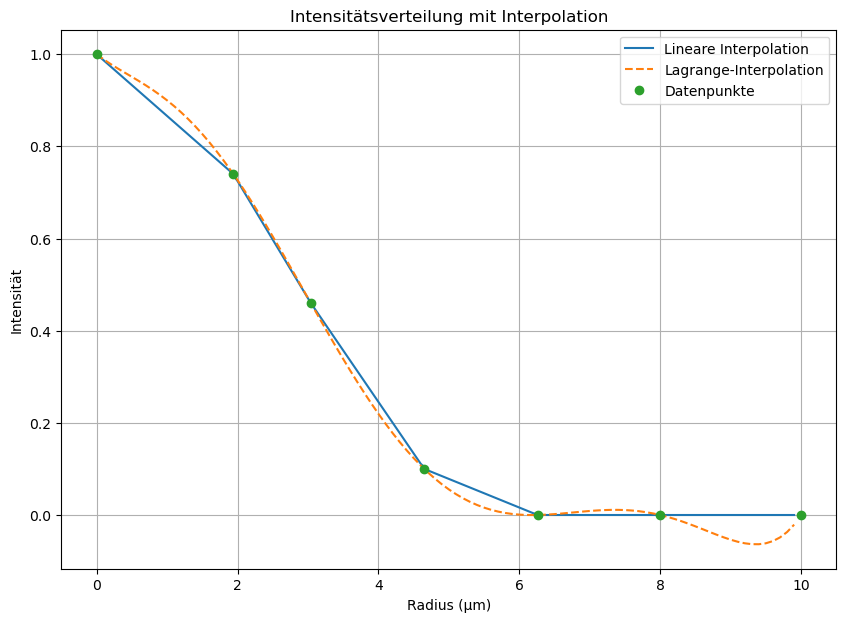

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, lagrange

# Daten einlesen
radius, intensität = np.genfromtxt(r"Daten\laser_intensity.csv", delimiter=",", unpack=True)

radius_neu = np.arange(0, 10, 0.1)
intensität_neu_linear = np.interp(radius_neu, radius, intensität)

lagrange_poly = lagrange(radius, intensität)
intensität_neu_lagrange = lagrange_poly(radius_neu)


plt.figure(figsize=(10, 7))
plt.plot(radius_neu, intensität_neu_linear, '-', label='Lineare Interpolation')
plt.plot(radius_neu, intensität_neu_lagrange, '--', label='Lagrange-Interpolation')
plt.plot(radius, intensität, 'o', label='Datenpunkte')
plt.title('Intensitätsverteilung mit Interpolation')
plt.xlabel('Radius (µm)')
plt.ylabel('Intensität')
plt.legend()
plt.grid() 
plt.show()